### Importing Libraries

In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D ,MaxPool2D,Dense,Flatten,Dropout  
from tensorflow.keras.preprocessing.image import load_img
from matplotlib.image import imread
import cv2
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras

### Loading Data File

In [2]:
covid_paths=[]
for name in glob('D:\projects\Covid --- 19\covid\*',recursive=True):
    covid_paths.append(name)
print(len(covid_paths))

536


In [3]:
normal_paths=[]
for name in glob('D:\\projects\\Covid --- 19\\normal\*',recursive=True):
    normal_paths.append(name)
print(len(normal_paths))

536


### reading images

In [4]:
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        img = cv2.imread(i ,cv2.IMREAD_COLOR)
        img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
        img_arrays.append([img_sized, label])
    return img_arrays

In [5]:
class0_array = get_image_arrays(normal_paths, 0)
class1_array = get_image_arrays(covid_paths, 1)

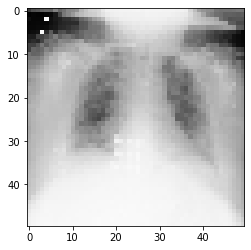

In [6]:
plt.imshow(class1_array[0][0])

In [7]:
combined_data = np.concatenate((class0_array, class1_array))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Splitting data

In [8]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [9]:
X = np.array(X).reshape(-1, 50, 50, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(804, 50, 50, 3) (268, 50, 50, 3) (804, 2) (268, 2)


### Building model

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=100, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(50,50,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(2,2), strides=(2,2), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(2,2), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(9216,input_shape=(12544,), activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [12]:
## compiling model
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall','Precision']
)

In [13]:
### fitting model
history=model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=16)

Epoch 1/16
26/26 [==============================] - 21s 704ms/step - loss: 0.7403 - accuracy: 0.5448 - recall: 0.4552 - precision: 0.5571 - val_loss: 0.6944 - val_accuracy: 0.5149 - val_recall: 0.5224 - val_precision: 0.5185
Epoch 2/16
26/26 [==============================] - 19s 743ms/step - loss: 0.6856 - accuracy: 0.6580 - recall: 0.6182 - precision: 0.6046 - val_loss: 0.6763 - val_accuracy: 0.5149 - val_recall: 0.5672 - val_precision: 0.5390
Epoch 3/16
26/26 [==============================] - 20s 760ms/step - loss: 0.6149 - accuracy: 0.7102 - recall: 0.6692 - precision: 0.6609 - val_loss: 0.6573 - val_accuracy: 0.5261 - val_recall: 0.5634 - val_precision: 0.5412
Epoch 4/16
26/26 [==============================] - 22s 834ms/step - loss: 0.5656 - accuracy: 0.7637 - recall: 0.7040 - precision: 0.7075 - val_loss: 0.6315 - val_accuracy: 0.5896 - val_recall: 0.6306 - val_precision: 0.5909
Epoch 5/16
26/26 [==============================] - 20s 769ms/step - loss: 0.5267 - accuracy: 0.7973

In [14]:
e=model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 92ms/step - loss: 0.2374 - accuracy: 0.9478 - recall: 0.9664 - precision: 0.9250


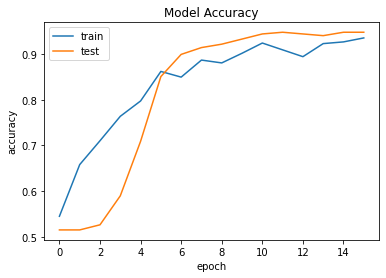

In [15]:
import matplotlib.pyplot as plt
#plotting the Accuracy of test and training sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

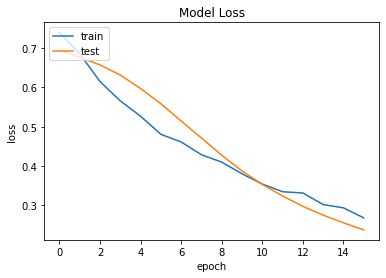

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 84ms/step


In [18]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [19]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [20]:
### Evaluation of model
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=['Negative','Positive']))

Confusion Matrix
[[133   5]
 [  9 121]]
Classification Report
              precision    recall  f1-score   support

    Negative       0.94      0.96      0.95       138
    Positive       0.96      0.93      0.95       130

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268

